In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, RidgeCV 
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
import matplotlib.pyplot as plt

In [44]:
pd.read_csv("datasets/playground-series-s4e5/sample_submission.csv")

,id,FloodProbability
0,1117957,0.5
1,1117958,0.5
2,1117959,0.5
3,1117960,0.5
4,1117961,0.5
...,...,...
745300,1863257,0.5
745301,1863258,0.5
745302,1863259,0.5
745303,1863260,0.5


In [89]:
def submit_for_model(submission_data, model):
    #submission_data = pd.read_csv("datasets/playground-series-s4e5/test.csv")
    #submission_data["sum_features_in_range"] = submission_data[feature_cols].sum(axis=1).isin(np.arange(72, 76))
    pred = model.predict(submission_data)
    submission = pd.DataFrame({'id': submission_data.id, 'FloodProbability': pred})
    submission.to_csv("submission.csv", index=False)

In [46]:
train = pd.read_csv("datasets/playground-series-s4e5/train.csv")

In [47]:
train.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

## First, check the data

In [48]:
train.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

## Next, feature engineering

In [137]:
feature_cols = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors']
X = train[feature_cols]
y = train["FloodProbability"]

### Let's do some exploratory analysis

In [108]:
features_sum = X.sum(axis=1)
features_sum.describe()

count    1.117957e+06
mean     9.878823e+01
std      8.307287e+00
min      6.300000e+01
25%      9.400000e+01
50%      9.800000e+01
75%      1.040000e+02
max      1.440000e+02
dtype: float64

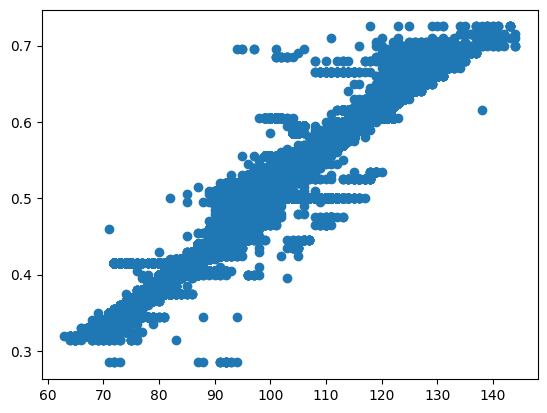

In [109]:
plt.scatter(features_sum, y)
plt.show()

In [110]:
corr = pd.DataFrame({"sums" : features_sum, "probs": y})
corr_means = corr.groupby("sums").mean()
corr_min = corr.groupby("sums").min()
corr_max = corr.groupby("sums").max()

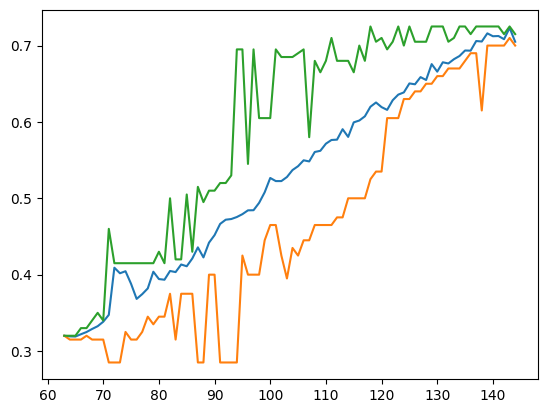

In [111]:
plt.plot(corr_means)
plt.plot(corr_min)
plt.plot(corr_max)
plt.show()

## Then, train-test split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## After that, model engineering

In [113]:
model = Ridge()

## Then training and validation

In [114]:
model.fit(X_train, y_train)

Ridge()

In [115]:
model.score(X_test, y_test)

0.8456537265849814

In [116]:
submit_for_model(model)

TypeError: submit_for_model() missing 1 required positional argument: 'model'

## Try different model

In [120]:
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from catboost import CatBoostRegressor

In [121]:
model = CatBoostRegressor(verbose=False, allow_writing_files=False)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8461456702023054

In [122]:
submit_for_model(model)

TypeError: submit_for_model() missing 1 required positional argument: 'model'

## Try some more features

In [126]:
def data_transform(data):
    data['fsum'] = data[feature_cols].sum(axis=1)
    data['min'] = data[feature_cols].min(axis=1)
    data['mean'] = 0.1 * data [feature_cols].mean(axis=1)
    data['median'] = 0.1 * data[feature_cols].median(axis=1)
    data['max'] = data[feature_cols].max(axis=1)
    data['std'] = data[feature_cols].std(axis=1)
    data['q1'] = data[feature_cols].quantile(0.25,axis=1)
    data['q3'] = data[feature_cols].quantile(0.75,axis=1)
    data['iqr'] = data['q3'] - data['q1']
    data["sum_features_in_range"] = data[feature_cols].sum(axis=1).isin(np.arange(72, 76))
    data['range_features'] = data['max'] - data['min']
    data['variance_features'] = data[feature_cols].var(axis=1)
    data['skewness_features'] = data[feature_cols].skew(axis=1)
    data['kurtosis_features'] = data[feature_cols].kurtosis(axis=1)
    
    return data

In [138]:
X = data_transform(X)

/var/folders/t6/1sf85j5s5pbgsfpgxrk8t3m00000gn/T/ipykernel_88303/4192651606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fsum'] = data[feature_cols].sum(axis=1)


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [131]:
model = CatBoostRegressor(verbose=False, allow_writing_files=False)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8700485390833796

In [101]:
importances = [(name, importance) for name, importance in zip(X.columns, model.feature_importances_)]
importances = sorted(importances, key=lambda x: x[1])
importances

[('q1', 0.057575928985641976),
 ('AgriculturalPractices', 0.06284734409085407),
 ('ClimateChange', 0.06794894194792084),
 ('PopulationScore', 0.06814063811587669),
 ('range_features', 0.06951819213033114),
 ('CoastalVulnerability', 0.07264697899145503),
 ('q3', 0.07361523558053501),
 ('PoliticalFactors', 0.07427758562345259),
 ('WetlandLoss', 0.0747141546450918),
 ('min', 0.0755899416922587),
 ('Urbanization', 0.07659574101726255),
 ('Deforestation', 0.07805270067761026),
 ('DrainageSystems', 0.0807244742270824),
 ('DeterioratingInfrastructure', 0.08199637750049923),
 ('median', 0.08329920130652134),
 ('RiverManagement', 0.08382104480120607),
 ('DamsQuality', 0.08463866422156933),
 ('Landslides', 0.08538333362813007),
 ('Watersheds', 0.08545943859260675),
 ('TopographyDrainage', 0.09251321867875172),
 ('Encroachments', 0.09565746153879628),
 ('IneffectiveDisasterPreparedness', 0.09692234035331372),
 ('iqr', 0.10034842005003775),
 ('InadequatePlanning', 0.10097410481739073),
 ('Siltatio

In [132]:
submission_data = pd.read_csv("datasets/playground-series-s4e5/test.csv")
submit_for_model(data_transform(submission_data), model)

In [133]:
submission_data

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,max,std,q1,q3,iqr,sum_features_in_range,range_features,variance_features,skewness_features,kurtosis_features
0,1117957,4,6,3,5,6,7,8,7,8,...,8,1.605091,4.00,7.00,3.00,False,5,2.576316,0.069366,-1.041033
1,1117958,4,4,2,9,5,5,4,7,5,...,9,1.905670,4.00,5.00,1.00,False,8,3.631579,0.507005,0.630540
2,1117959,1,3,6,5,7,2,4,6,4,...,9,2.259483,2.75,6.00,3.25,False,8,5.105263,0.304178,-0.836166
3,1117960,2,4,4,6,4,5,4,3,4,...,8,1.602629,4.00,6.00,2.00,False,6,2.568421,0.480767,-0.135914
4,1117961,6,3,2,4,6,4,5,5,3,...,8,1.602629,3.75,6.00,2.25,False,6,2.568421,0.225040,-0.319886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,1863257,5,4,8,3,5,4,4,5,5,...,8,1.454575,4.00,5.25,1.25,False,7,2.115789,-0.328351,1.873119
745301,1863258,4,4,2,12,4,3,4,3,5,...,12,2.089447,3.00,5.00,2.00,False,10,4.365789,2.674538,9.159246
745302,1863259,5,7,9,5,5,6,7,5,5,...,11,2.339591,5.00,7.00,2.00,False,8,5.473684,1.041164,0.357118
745303,1863260,4,7,6,3,5,2,3,8,6,...,8,1.954078,3.75,7.00,3.25,False,6,3.818421,-0.360800,-0.973613


## Introduce additional data

In [139]:
additional = pd.read_csv("datasets/playground-series-s4e5/flood.csv")
additional_X = additional[feature_cols]
additional_y = additional["FloodProbability"]

In [140]:
additional_X = data_transform(additional_X)
X = pd.concat((X, additional_X))
y = pd.concat((y, additional_y))

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [143]:
model = CatBoostRegressor(verbose=False, allow_writing_files=False)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8706213392823796

In [144]:
submit_for_model(data_transform(submission_data), model)